<a href="https://colab.research.google.com/github/petermr/semanticClimate/blob/main/outreach/climate_knowledge_hunt_hackathon/Hackathon_Notebook/climate_hackathon_chapter08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

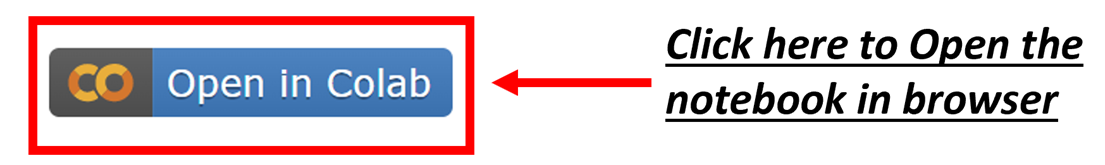

##Install packages
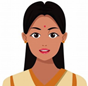
**To install packages run the cell below... This may take 4 min or so**


---
<hr height=3>

To run a cell please follow this figure. Mainly you have to click the play button....


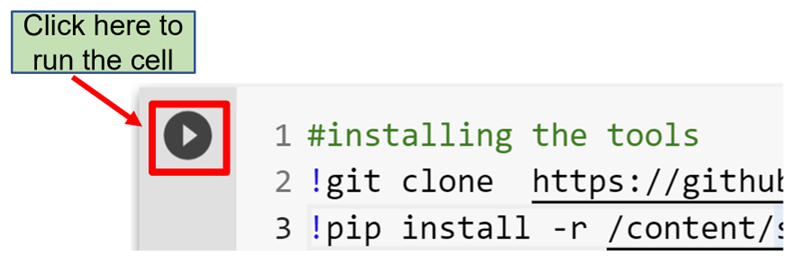




In [ ]:
#installing the tools
!git clone  https://github.com/petermr/semanticClimate.git
!pip install -r /content/semanticClimate/keyword_extraction/code/requirement.txt
!pip install docanalysis
!pip install py4ami==0.0.35
!python -m spacy download en_core_web_lg
import nltk
nltk.download('stopwords')

***Please Dont forget to restart runtime after running the previous cell, else the newly installed packages won trun properly***

## Conversion ---> pdf to html

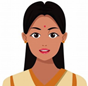
**In order to unlock a pdf into an HTML, you just have to click on the cell run below...This takes less than a min to run...**

In [ ]:
import os
import shutil

chapter_no ='Chapter08'
saving_path_html = f'/content/Pdf_to_html_{chapter_no}/'
if not os.path.exists(saving_path_html+'final/'):
  os.makedirs(saving_path_html+'final/')
if not os.path.exists(saving_path_html+'temp/'):
  os.makedirs(saving_path_html+'temp/')  

print('\033[1;32m We have successfully finished running this cell.')

 We have successfully finished running this cell.


In [ ]:
# pdf to html conversion
!py4ami PDF\
--inpath '/content/semanticClimate/ipcc/ar6/wg3/Chapter08/fulltext.pdf'\
--outpath '/content/Pdf_to_html_Chapter08/final/fulltext.html'\
--outdir  '/content/Pdf_to_html_Chapter08/temp/'\
--pages 1_11

print('\033[1;32m We have successfully finished running this cell.')

You can find the output here: **/content/semanticClimate/ipcc/ar6/wg3/Chapter08/fulltext.html**
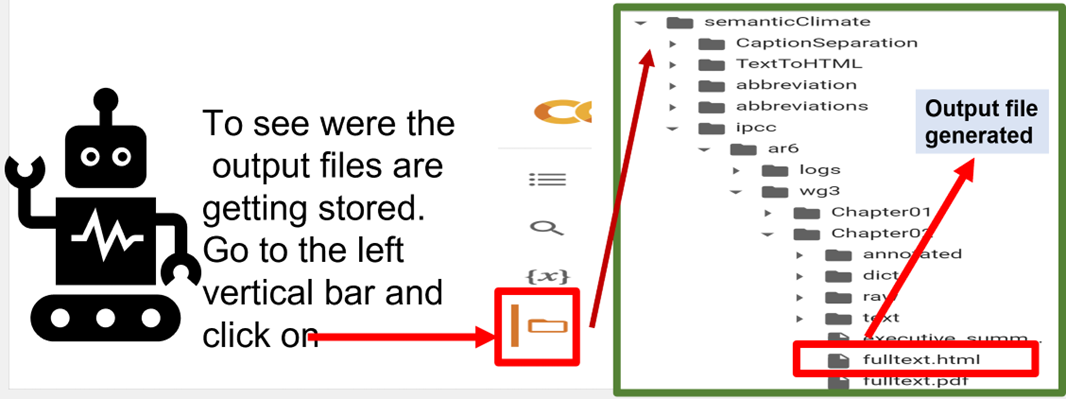

## Abbreviations extraction

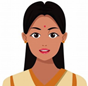
**To extract abbreviation, just run the cell below...It takes a min or so...**

In [ ]:
#making directory to store and obtain the dictionaries 
saving_path = f'/content/wiki_hack/{chapter_no}/sections/0_mainbody/'
if not os.path.exists(saving_path):
  os.makedirs(saving_path)
shutil.copy(f'/content/semanticClimate/ipcc/ar6/wg3/{chapter_no}/fulltext.html',f'/content/wiki_hack/{chapter_no}/sections/0_mainbody')

print('\033[1;32m We have successfully finished running this cell.')

 We have successfully finished running this cell.


In [ ]:
#abbreviation extraction --automated abbreviation using docanalysis
!docanalysis --project_name '/content/wiki_hack' --output 'entities.csv' --make_ami_dict 'entities.xml'
# structuring the dictionary
!docanalysis --project_name '/content/wiki_hack'\
--output 'Indexing.csv' --make_json 'Indexing.json'\
--make_ami_dict 'entities' --extract_abb 'abb_chapter08'

print('\033[1;32m We have successfully finished running this cell.')

You can find the output of abbreviation extraction here: **/content/wiki_hack/abb_chapter08.xml**

You can't see the file within colab enviornmnet. Therefore follow th epath and download the file and open in your respective system.

Follow this picture to understand how to download a file.

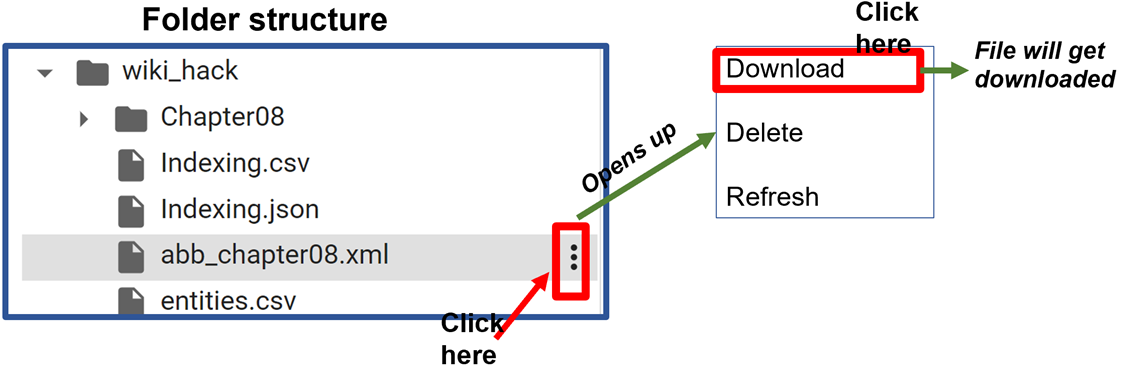

##Keywords/ Key-Phrases Extraction

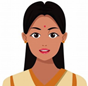
**To get keywords and key-phrases extracted run the cell below...It take a min or two......**

In [ ]:
# keyword/ phrases extraction
!python /content/semanticClimate/keyword_extraction/code/keyword_extraction.py \
--html_path /content/semanticClimate/ipcc/ar6/wg3/Chapter08/fulltext.html \
--saving_path /content/ \
--method 'gensim'
print('\033[1;32m We have successfully finished running this cell.')

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.
Moving 0 files to the new cache system
0it [00:00, ?it/s]
 We have successfully finished running this cell.


You can find the output of Keyword/key-phrases extraction here: **/content/gensim_keywords.csv**

A demonstration on how to look into CSV/HTML files on your right side of the notebbok:

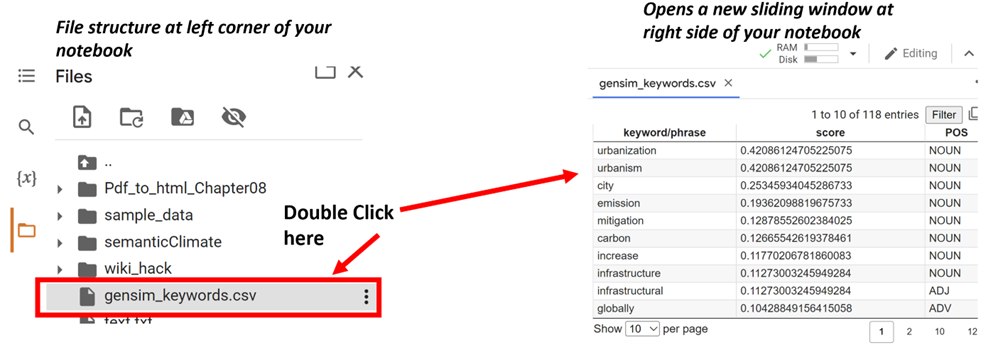

Figure(1300x900)


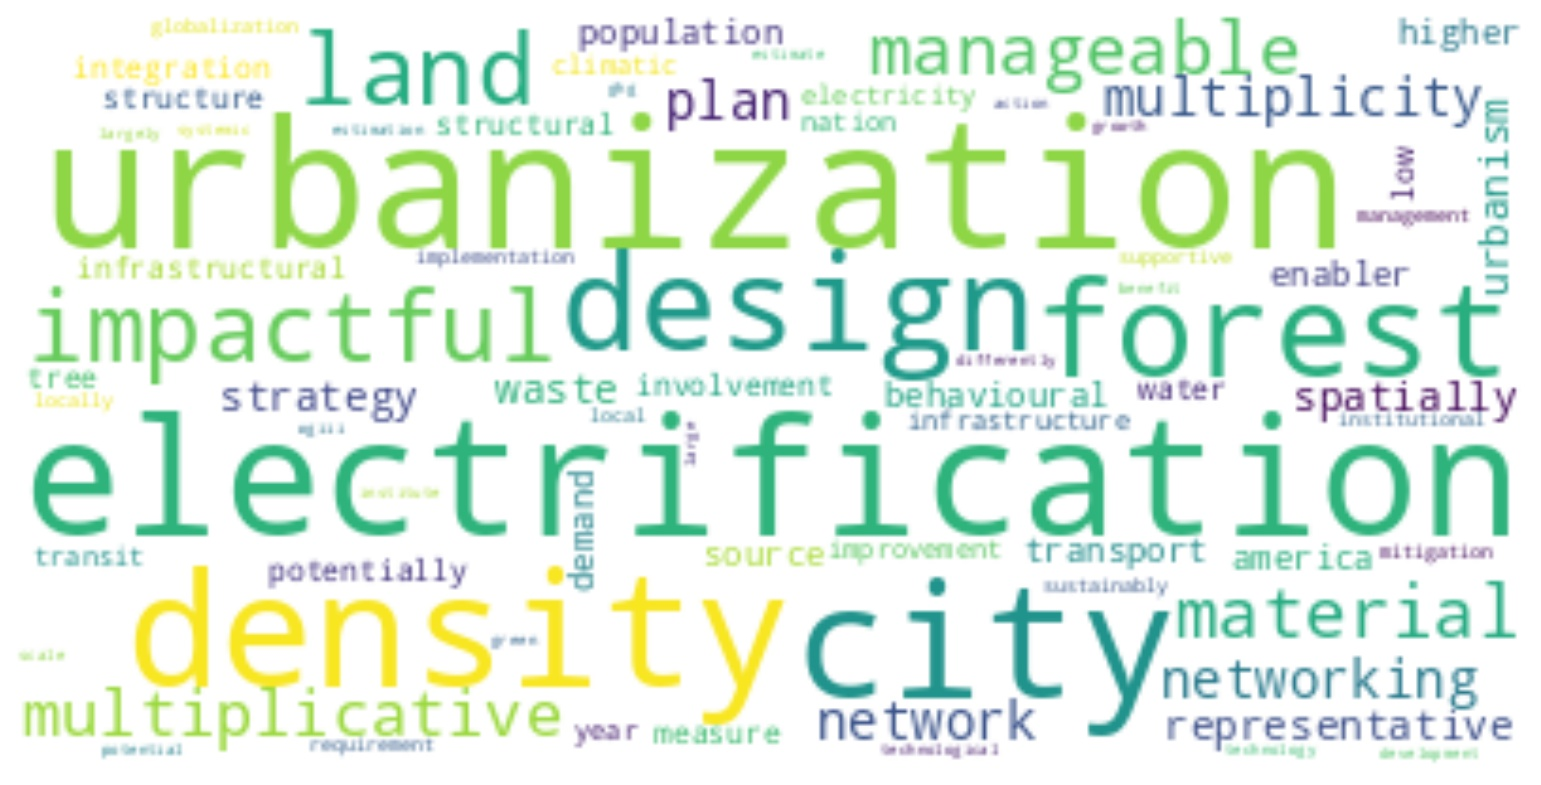

In [ ]:
# WordCloud Generation
!python /content/semanticClimate/wordCloud_Generation/SemanticClimate_wordcloud.py\
--file_path '/content/semanticClimate/wordCloud_Generation/'\
--saving_path '/content/'\
--Chapter_name 'Chapter08'

import cv2
from PIL import Image
from google.colab.patches import cv2_imshow
img = cv2.imread(f'/content/{chapter_no}_word_cloud.jpg', cv2.IMREAD_COLOR)
cv2_imshow(img)


#print('\033[1;32m We have successfully finished running this cell.')

##HTML Markup and Annotation
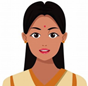
**To Markup the HTML please click on the cell bellow..This also takes a min to run...**

In [ ]:
# HTM markup using abbreviation dictionary + manual dictionary + keyword/phrases 
!py4ami HTML --annotate\
--dict /content/wiki_hack/abb_chapter08.xml\
--inpath /content/semanticClimate/ipcc/ar6/wg3/Chapter08/fulltext.html\
--outpath /content/annotated_fulltext_Chapter08.html\
--color YELLOW

print('\033[1;32m We have successfully finished running this cell.')

You can find the ouput of HTML Markup and annotation chuck here: **/content/annotated_fulltext_Chapter08.html**

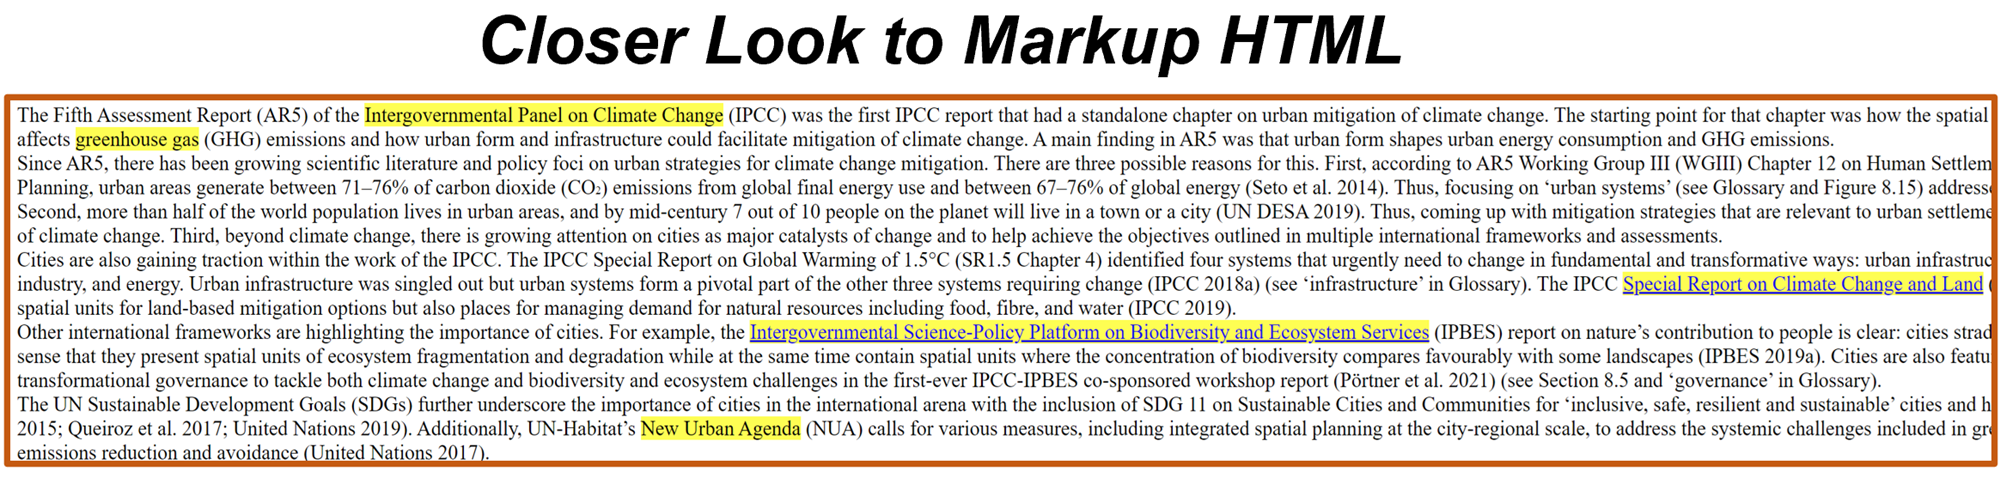